In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("airbnb-price-prediction.csv")

In [3]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [5]:
df.amenities = df.amenities.map(lambda x: "|".join([i.replace("}", "").replace("{", "").replace('"', "")\
                                for i in x.split(",")]))
df.amenities.head()

0    Wireless Internet|Air conditioning|Kitchen|Hea...
1    Wireless Internet|Air conditioning|Kitchen|Hea...
2    TV|Cable TV|Wireless Internet|Air conditioning...
3    TV|Cable TV|Internet|Wireless Internet|Kitchen...
4    TV|Internet|Wireless Internet|Air conditioning...
Name: amenities, dtype: object

In [6]:
df.amenities = df.amenities.map(lambda x: x.split("|"))
df.amenities.head()

0    [Wireless Internet, Air conditioning, Kitchen,...
1    [Wireless Internet, Air conditioning, Kitchen,...
2    [TV, Cable TV, Wireless Internet, Air conditio...
3    [TV, Cable TV, Internet, Wireless Internet, Ki...
4    [TV, Internet, Wireless Internet, Air conditio...
Name: amenities, dtype: object

In [7]:
amenities_list = list(np.unique(np.concatenate(df.amenities))[1:-2])
print(amenities_list)

[' smooth pathway to front door', '24-hour check-in', 'Accessible-height bed', 'Accessible-height toilet', 'Air conditioning', 'Air purifier', 'BBQ grill', 'Baby bath', 'Baby monitor', 'Babysitter recommendations', 'Bath towel', 'Bathtub', 'Bathtub with shower chair', 'Beach essentials', 'Beachfront', 'Bed linens', 'Body soap', 'Breakfast', 'Buzzer/wireless intercom', 'Cable TV', 'Carbon monoxide detector', 'Cat(s)', 'Changing table', 'Children’s books and toys', 'Children’s dinnerware', 'Cleaning before checkout', 'Coffee maker', 'Cooking basics', 'Crib', 'Disabled parking spot', 'Dishes and silverware', 'Dishwasher', 'Dog(s)', 'Doorman', 'Doorman Entry', 'Dryer', 'EV charger', 'Elevator', 'Elevator in building', 'Essentials', 'Ethernet connection', 'Extra pillows and blankets', 'Family/kid friendly', 'Fire extinguisher', 'Fireplace guards', 'Firm matress', 'Firm mattress', 'First aid kit', 'Fixed grab bars for shower & toilet', 'Flat', 'Flat smooth pathway to front door', 'Free parki

In [8]:
df['amenities_percentage'] = df.amenities.apply(lambda x: len(x)/len(amenities_list)*100)

In [9]:
df_new = df[['id', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 
             'cancellation_policy', 'cleaning_fee', 'city', 'host_has_profile_pic', 'host_identity_verified', 
             'host_response_rate', 'host_since', 'instant_bookable', 'number_of_reviews','review_scores_rating',
            'amenities_percentage', 'log_price']]

In [10]:
df_new.head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,number_of_reviews,review_scores_rating,amenities_percentage,log_price
0,6901257,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,strict,True,NYC,t,t,NaN,2012-03-26,f,2,100.0,7.03125,5.010635
1,6304928,Apartment,Entire home/apt,7,1.0,3.0,3.0,Real Bed,strict,True,NYC,t,f,100%,2017-06-19,t,6,93.0,11.71875,5.129899
2,7919400,Apartment,Entire home/apt,5,1.0,1.0,3.0,Real Bed,moderate,True,NYC,t,t,100%,2016-10-25,t,10,92.0,14.84375,4.976734
3,13418779,House,Entire home/apt,4,1.0,2.0,2.0,Real Bed,flexible,True,SF,t,t,NaN,2015-04-19,f,0,NaN,11.71875,6.620073
4,3808709,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,moderate,True,DC,t,t,100%,2015-03-01,t,4,40.0,9.37500,4.744932


In [11]:
df_new.shape

(74111, 20)

In [12]:
#1. Explanatory Data Analysis (EDA)

df_new.describe()

,id,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,amenities_percentage,log_price
count,7.411100e+04,74111.000000,73911.000000,74020.000000,73980.000000,74111.000000,57389.000000,74111.000000,74111.000000
mean,1.126662e+07,3.155146,1.235263,1.265793,1.710868,20.900568,94.067365,13.751881,4.782069
std,6.081735e+06,2.153589,0.582044,0.852143,1.254142,37.828641,7.836556,5.419490,0.717394
min,3.440000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.781250,0.000000
25%,6.261964e+06,2.000000,1.000000,1.000000,1.000000,1.000000,92.000000,10.156250,4.317488
50%,1.225415e+07,2.000000,1.000000,1.000000,1.000000,6.000000,96.000000,13.281250,4.709530
75%,1.640226e+07,4.000000,1.000000,1.000000,2.000000,23.000000,100.000000,17.187500,5.220356
max,2.123090e+07,16.000000,8.000000,10.000000,18.000000,605.000000,100.000000,67.187500,7.600402


In [13]:
df_new.isna().sum()

id                            0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                   200
bedrooms                     91
beds                        131
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
number_of_reviews             0
review_scores_rating      16722
amenities_percentage          0
log_price                     0
dtype: int64

In [14]:
df_new = df_new[df_new.bathrooms.notna()]
df_new = df_new[df_new.bedrooms.notna()]
df_new = df_new[df_new.beds.notna()]
df_new = df_new[df_new.host_since.notna()]

In [15]:
df_new.host_response_rate = df_new.host_response_rate.fillna("0%")
df_new.review_scores_rating = df_new.review_scores_rating.fillna(0)

In [16]:
df_new.isna().sum()

id                        0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
number_of_reviews         0
review_scores_rating      0
amenities_percentage      0
log_price                 0
dtype: int64

In [17]:
df_new.head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,number_of_reviews,review_scores_rating,amenities_percentage,log_price
0,6901257,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,strict,True,NYC,t,t,0%,2012-03-26,f,2,100.0,7.03125,5.010635
1,6304928,Apartment,Entire home/apt,7,1.0,3.0,3.0,Real Bed,strict,True,NYC,t,f,100%,2017-06-19,t,6,93.0,11.71875,5.129899
2,7919400,Apartment,Entire home/apt,5,1.0,1.0,3.0,Real Bed,moderate,True,NYC,t,t,100%,2016-10-25,t,10,92.0,14.84375,4.976734
3,13418779,House,Entire home/apt,4,1.0,2.0,2.0,Real Bed,flexible,True,SF,t,t,0%,2015-04-19,f,0,0.0,11.71875,6.620073
4,3808709,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,moderate,True,DC,t,t,100%,2015-03-01,t,4,40.0,9.37500,4.744932


In [18]:
property_type_list = ['Apartment', 'House', 'Condominium', 'Townnhouse', 'Loft']

In [19]:
df_new.property_type = df_new.property_type.apply(lambda x: x if x in property_type_list else "Others")

In [20]:
df_new.cleaning_fee = df_new.cleaning_fee.apply(lambda x: "True" if x is True else "False")
df_new.host_has_profile_pic = df_new.host_has_profile_pic.apply(lambda x: "True" if x == "t" else "False")
df_new.host_identity_verified = df_new.host_identity_verified.apply(lambda x: "True" if x == "t" else "False")
df_new.instant_bookable = df_new.instant_bookable	.apply(lambda x: "True" if x == "t" else "False")

In [21]:
df_new.host_response_rate = df_new.host_response_rate.apply(lambda x: float(x.strip("%")))

In [22]:
df_new.host_since = pd.to_datetime(df_new.host_since)
today = "2020-09-10"
df_new['host_days'] = df_new.host_since.apply(lambda x: (pd.to_datetime(today) - x).days)

In [23]:
df_new = df_new.drop(columns=['host_since'])

In [24]:
#df_new['price'] = np.exp(df_new.log_price)
df_new['price'] = df_new['log_price']
df_new = df_new.drop(columns='log_price')

In [25]:
df_new.describe()

,id,accommodates,bathrooms,bedrooms,beds,host_response_rate,number_of_reviews,review_scores_rating,amenities_percentage,host_days,price
count,7.357900e+04,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000
mean,1.126406e+07,3.160888,1.236039,1.266802,1.712975,71.252708,20.889425,72.865437,13.777602,2239.792971,4.782890
std,6.082296e+06,2.156297,0.582947,0.853585,1.256094,42.988835,37.818332,39.913863,5.409368,659.296636,0.717937
min,3.440000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.781250,1072.000000,0.000000
25%,6.259916e+06,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,80.000000,10.156250,1723.000000,4.317488
50%,1.225334e+07,2.000000,1.000000,1.000000,1.000000,100.000000,6.000000,94.000000,13.281250,2171.000000,4.718499
75%,1.639774e+07,4.000000,1.000000,1.000000,2.000000,100.000000,23.000000,99.000000,17.187500,2694.000000,5.220356
max,2.123090e+07,16.000000,8.000000,10.000000,18.000000,100.000000,605.000000,100.000000,67.187500,4574.000000,7.600402


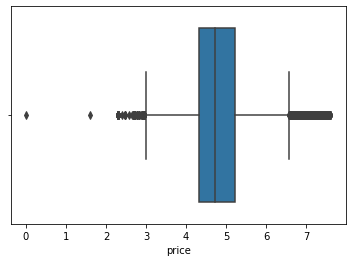

In [26]:
#Check outliers

sns.boxplot(df_new.price)

In [27]:
#Remove outliers

from numpy import mean
from numpy import std

def remove_outliers(x):
    data_mean = mean(x)
    data_std = std(x)
    cutoff = data_std*3
    lower = data_mean - cutoff
    upper = data_mean + cutoff
    return lower, upper

lower, upper = remove_outliers(df_new.price)

df_new = df_new.loc[(df_new.price > lower) & (df_new.price < upper)]

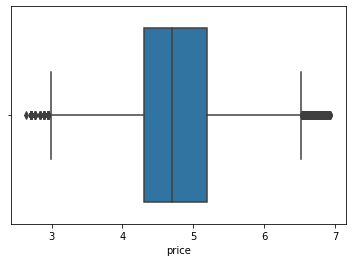

In [28]:
sns.boxplot(df_new.price)

In [29]:
#2. Feature Engineering

In [30]:
df_new.head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,amenities_percentage,host_days,price
0,6901257,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,strict,True,NYC,True,True,0.0,False,2,100.0,7.03125,3090,5.010635
1,6304928,Apartment,Entire home/apt,7,1.0,3.0,3.0,Real Bed,strict,True,NYC,True,False,100.0,True,6,93.0,11.71875,1179,5.129899
2,7919400,Apartment,Entire home/apt,5,1.0,1.0,3.0,Real Bed,moderate,True,NYC,True,True,100.0,True,10,92.0,14.84375,1416,4.976734
3,13418779,House,Entire home/apt,4,1.0,2.0,2.0,Real Bed,flexible,True,SF,True,True,0.0,False,0,0.0,11.71875,1971,6.620073
4,3808709,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,moderate,True,DC,True,True,100.0,True,4,40.0,9.37500,2020,4.744932


In [31]:
df_new.describe()

,id,accommodates,bathrooms,bedrooms,beds,host_response_rate,number_of_reviews,review_scores_rating,amenities_percentage,host_days,price
count,7.306100e+04,73061.000000,73061.000000,73061.000000,73061.000000,73061.000000,73061.000000,73061.000000,73061.000000,73061.000000,73061.000000
mean,1.126448e+07,3.132109,1.224874,1.254568,1.698512,71.397312,21.012332,73.144208,13.773540,2240.655137,4.768182
std,6.081847e+06,2.108509,0.549851,0.830142,1.227592,42.919824,37.915194,39.727155,5.407172,659.530685,0.689842
min,3.440000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.781250,1072.000000,2.639057
25%,6.259928e+06,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,80.000000,10.156250,1724.000000,4.304065
50%,1.225370e+07,2.000000,1.000000,1.000000,1.000000,100.000000,6.000000,94.000000,13.281250,2172.000000,4.700480
75%,1.639808e+07,4.000000,1.000000,1.000000,2.000000,100.000000,24.000000,99.000000,17.187500,2695.000000,5.192957
max,2.123090e+07,16.000000,8.000000,10.000000,18.000000,100.000000,605.000000,100.000000,67.187500,4574.000000,6.932448


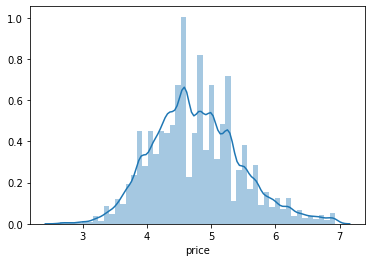

In [32]:
sns.distplot(df_new.price)

In [33]:
from sklearn.model_selection import train_test_split

x = df_new.iloc[:, 1:-1]
y = df_new.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Binary variables

le = LabelEncoder()

binary_var = ['cleaning_fee', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']

for i in binary_var:
    le.fit(x_train[i])
    x_train[i] = le.transform(x_train[i])
    x_test[i] = le.transform(x_test[i])

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [35]:
#Multi-category variables

oe = OneHotEncoder(sparse=False, handle_unknown = 'error')
oe.fit(x_train[['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']])

multi = oe.transform(x_train[['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']])
df_multi = pd.DataFrame(index = x_train.index, data=multi, columns=oe.get_feature_names(['property_type', 'room_type',
                                                                    'bed_type', 'cancellation_policy', 'city']))
x_train = pd.concat([x_train, df_multi], axis=1)
x_train.drop(columns=['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city'], inplace=True)

In [36]:
multi_test = oe.transform(x_test[['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']])
df_multi_test = pd.DataFrame(index = x_test.index, data=multi_test, columns=oe.get_feature_names(['property_type', 'room_type',
                                                                    'bed_type', 'cancellation_policy', 'city']))
x_test = pd.concat([x_test, df_multi_test], axis=1)
x_test.drop(columns=['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city'], inplace=True)

In [37]:
x_train.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,...,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
60249,1,1.0,1.0,1.0,1,1,1,100.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29724,1,1.0,1.0,1.0,1,1,0,100.0,0,28,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38325,2,2.0,1.0,1.0,1,1,1,50.0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40031,2,1.0,1.0,1.0,1,1,1,100.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44391,3,1.0,1.0,1.0,1,1,1,0.0,0,103,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [38]:
x_test.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,...,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
17513,2,1.0,1.0,1.0,1,1,1,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14359,3,1.0,1.0,1.0,1,1,1,0.0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6346,1,1.0,1.0,1.0,0,1,0,100.0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
496,2,1.0,1.0,1.0,1,1,0,0.0,0,12,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39474,4,1.0,1.0,2.0,1,1,1,100.0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
#3. Feature Scaling

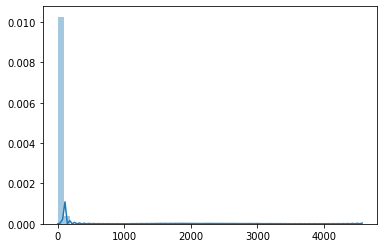

In [82]:
sns.distplot(x_train)

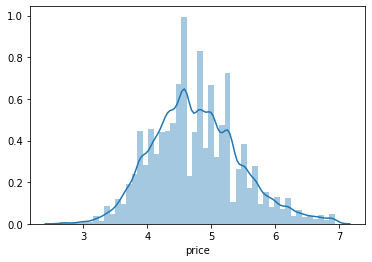

In [81]:
sns.distplot(y_train)

In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mn = MinMaxScaler()

x_train_scaled = pd.DataFrame(mn.fit_transform(x_train), columns = x_train.columns)
x_test_scaled = pd.DataFrame(mn.fit_transform(x_test), columns = x_test.columns)

y_train_scaled = pd.DataFrame(mn.fit_transform(y_train.to_numpy().reshape(-1,1)), columns = ['price'], index = x_train_scaled.index)
y_test_scaled = pd.DataFrame(mn.fit_transform(y_test.to_numpy().reshape(-1,1)), columns = ['price'], index = x_test_scaled.index)

In [ ]:
#4. Neural Network Optimisation (Neural Network + Feature Selection)

In [45]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#4.1. Neural Networks with NO Feature Selection

685/685 [==============================] - 1s 843us/step - loss: 0.1924 - mae: 0.3356


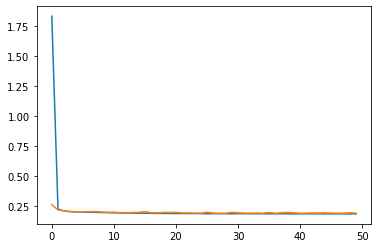

In [67]:
#Step1. Define the model

model = Sequential()

model.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (x_train_scaled.shape[1],)))
model.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(1))


#Step2. Compile the model
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model.compile(optimizer = 'adam', loss = 'mse', metrics = 'mae')

#Step3. Fit the model
history = model.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=50, 
                    batch_size=64, verbose=0)

#Step4. Evaluate the model

loss, mae = model.evaluate(x_test_scaled, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()

In [ ]:
#4.2. Neural Networks with Feature Selection 
#4.2.1. Neural Networks with Correlation Heatmap

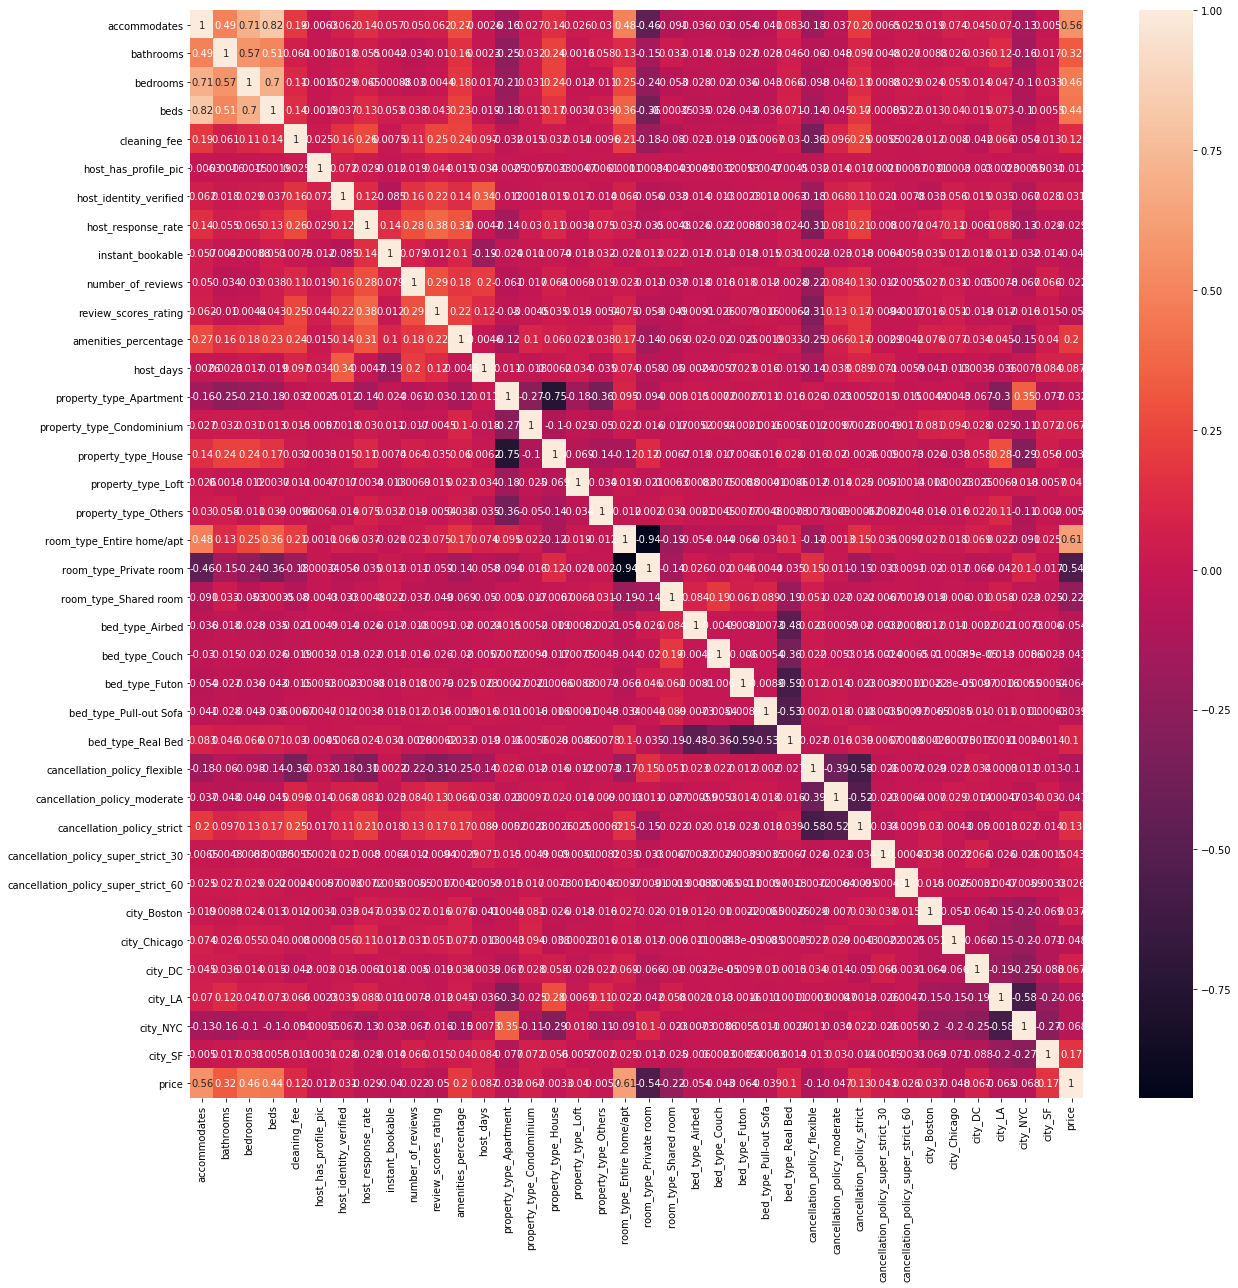

In [41]:
df_train = pd.concat([x_train_scaled, y_train_scaled], axis=1)
cor = df_train.corr()

plt.figure(figsize=(20,20))
sns.heatmap(cor, xticklabels = df_train.columns, yticklabels = df_train.columns, annot=True)
plt.show()

In [42]:
correlation = cor.iloc[-1,:].sort_values()
print(correlation)

room_type_Private room                -0.544495
room_type_Shared room                 -0.223572
cancellation_policy_flexible          -0.104675
city_NYC                              -0.067732
city_LA                               -0.064769
bed_type_Futon                        -0.064101
bed_type_Airbed                       -0.053969
review_scores_rating                  -0.050448
city_Chicago                          -0.047726
cancellation_policy_moderate          -0.047041
bed_type_Couch                        -0.042820
instant_bookable                      -0.040161
bed_type_Pull-out Sofa                -0.038528
property_type_Apartment               -0.031609
host_response_rate                    -0.029453
number_of_reviews                     -0.022334
host_has_profile_pic                  -0.012086
property_type_Others                  -0.005159
property_type_House                   -0.003333
cancellation_policy_super_strict_60    0.026455
host_identity_verified                 0

In [43]:
selected_features = correlation[(correlation.values >= 0.1) | (correlation.values <= -0.1)].index[:-1]
print(selected_features)

Index(['room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_flexible', 'bed_type_Real Bed', 'cleaning_fee',
       'cancellation_policy_strict', 'city_SF', 'amenities_percentage',
       'bathrooms', 'beds', 'bedrooms', 'accommodates',
       'room_type_Entire home/apt'],
      dtype='object')


In [44]:
x_train_scaled_sf = x_train_scaled[selected_features]
x_test_scaled_sf = x_test_scaled[selected_features]

685/685 [==============================] - 1s 851us/step - loss: 0.2173 - mae: 0.3544


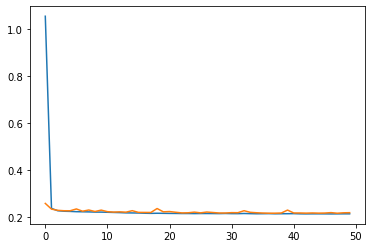

In [68]:
#Step1. Define the model2

model2 = Sequential()

model2.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (x_train_scaled_sf.shape[1],)))
model2.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model2.add(Dense(1))


#Step2. Compile the model2
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model2.compile(optimizer = 'adam', loss = 'mse', metrics = 'mae')

#Step3. Fit the model2
history = model2.fit(x_train_scaled_sf, y_train, validation_data=(x_test_scaled_sf, y_test), epochs=50, 
                    batch_size=64, verbose=0)

#Step4. Evaluate the model2

loss, mae = model2.evaluate(x_test_scaled_sf, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()


In [ ]:
#4.2.2. Neural Networks with PCA

In [61]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
pca.fit(x_train_scaled)

x_train_scaled_pca = pca.transform(x_train_scaled)
x_test_scaled_pca = pca.transform(x_test_scaled)

685/685 [==============================] - 1s 1ms/step - loss: 0.2058 - mae: 0.3475


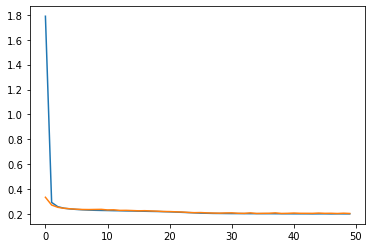

In [69]:
#Step1. Define the model3

model3 = Sequential()

model3.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (x_train_scaled_pca.shape[1],)))
model3.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model3.add(Dense(1))


#Step2. Compile the model3
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model3.compile(optimizer = 'adam', loss = 'mse', metrics = 'mae')

#Step3. Fit the model3
history = model3.fit(x_train_scaled_pca, y_train, validation_data=(x_test_scaled_pca, y_test), epochs=50, 
                    batch_size=64, verbose=0)

#Step4. Evaluate the model3

loss, mae = model3.evaluate(x_test_scaled_pca, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()

In [ ]:
#4.3. Neural Network with more layers

685/685 [==============================] - 1s 1ms/step - loss: 0.1959 - mae: 0.3358


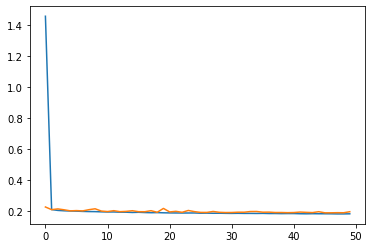

In [70]:
#Step1. Define the model4

model4 = Sequential()

model4.add(Dense(32, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (x_train_scaled.shape[1],)))
model4.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal'))
model4.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model4.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model4.add(Dense(1))


#Step2. Compile the model4
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model4.compile(optimizer = 'adam', loss = 'mse', metrics = 'mae')

#Step3. Fit the model4
history = model4.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=50, 
                    batch_size=64, verbose=0)

#Step4. Evaluate the model4

loss, mae = model4.evaluate(x_test_scaled, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()


In [ ]:
#4.4. Neural Network with different optimizers

685/685 [==============================] - 1s 1ms/step - loss: 0.1946 - mae: 0.3375


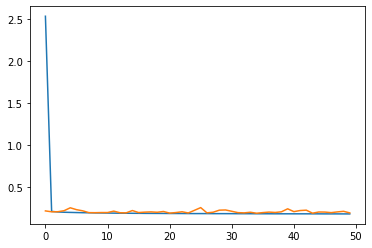

In [71]:
#Step1. Define the model5

model5 = Sequential()

model5.add(Dense(32, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (x_train_scaled.shape[1],)))
model5.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal'))
model5.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model5.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model5.add(Dense(1))


#Step2. Compile the model5
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model5.compile(optimizer = 'rmsprop', loss = 'mse', metrics = 'mae')

#Step3. Fit the model5
history = model5.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=50, 
                    batch_size=64, verbose=0)

#Step4. Evaluate the model5

loss, mae = model5.evaluate(x_test_scaled, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()


In [ ]:
#4.5. Neural Network with higher epochs (with Early Stopping)

685/685 [==============================] - 1s 961us/step - loss: 0.1958 - mae: 0.3371


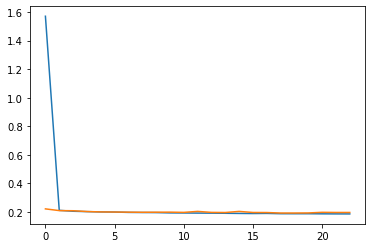

In [72]:
#Step1. Define the model6

model6 = Sequential()

model6.add(Dense(32, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (x_train_scaled.shape[1],)))
model6.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal'))
model6.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model6.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model6.add(Dense(1))


#Step2. Compile the model6
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model6.compile(optimizer = 'adam', loss = 'mse', metrics = 'mae')

#Step3. Fit the model6
es = EarlyStopping(monitor = 'val_loss', patience=5)
history = model6.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=200, 
                    batch_size=64, verbose=0, callbacks = [es])

#Step4. Evaluate the model6

loss, mae = model6.evaluate(x_test_scaled, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()


In [ ]:
#4.6 Neural Network with Regularization

In [ ]:
#4.6.1 DropOut

685/685 [==============================] - 1s 884us/step - loss: 0.2247 - mae: 0.3660


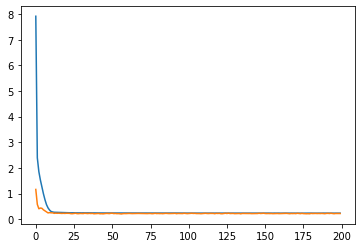

In [74]:
#Step1. Define the model7

model7 = Sequential()

model7.add(Dense(32, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (x_train_scaled.shape[1],)))
model7.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal'))
model7.add(Dropout(0.3))
model7.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model7.add(Dropout(0.3))
model7.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model7.add(Dropout(0.3))
model7.add(Dense(1))


#Step2. Compile the model7
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model7.compile(optimizer = 'adam', loss = 'mse', metrics = 'mae')

#Step3. Fit the model7
history = model7.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=200, 
                    batch_size=64, verbose=0)

#Step4. Evaluate the model7

loss, mae = model7.evaluate(x_test_scaled, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()

In [ ]:
#4.6.2 L1/L2 Regularization

685/685 [==============================] - 1s 1ms/step - loss: 0.2112 - mae: 0.3344


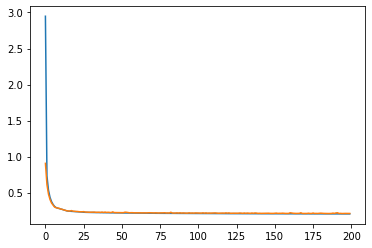

In [76]:
#Step1. Define the model8

model8 = Sequential()

model8.add(Dense(32, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (x_train_scaled.shape[1],)))
model8.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = 'l1'))
model8.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = 'l1'))
model8.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = 'l1'))
model8.add(Dense(1))


#Step2. Compile the model8
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model8.compile(optimizer = 'adam', loss = 'mse', metrics = 'mae')

#Step3. Fit the model8
history = model8.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=200, 
                    batch_size=64, verbose=0)

#Step4. Evaluate the model8

loss, mae = model8.evaluate(x_test_scaled, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()


In [ ]:
#4.7 Neural Network with different activation & initializer

In [ ]:
#4.7.1 Sigmoid + Glorot Normal

685/685 [==============================] - 1s 2ms/step - loss: 0.4807 - mae: 0.5496


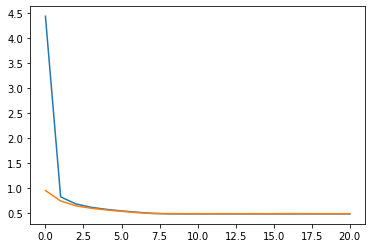

In [84]:
#Step1. Define the model9

model9 = Sequential()

model9.add(Dense(32, activation = 'sigmoid', kernel_initializer = 'glorot_normal', input_shape = (x_train_scaled.shape[1],)))
model9.add(Dense(16, activation = 'sigmoid', kernel_initializer = 'glorot_normal', kernel_regularizer = 'l1'))
model9.add(Dense(8, activation = 'sigmoid', kernel_initializer = 'glorot_normal', kernel_regularizer = 'l1'))
model9.add(Dense(8, activation = 'sigmoid', kernel_initializer = 'glorot_normal', kernel_regularizer = 'l1'))
model9.add(Dense(1))


#Step2. Compile the model9
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model9.compile(optimizer = 'adam', loss = 'mse', metrics = 'mae')

#Step3. Fit the model9
es = EarlyStopping(monitor = 'val_loss', patience = 5)
history = model9.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=200, 
                    batch_size=64, verbose=0, callbacks = [es])

#Step4. Evaluate the model9

loss, mae = model9.evaluate(x_test_scaled, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()


In [ ]:
#4.7.2 Relu + He Uniform

685/685 [==============================] - 1s 2ms/step - loss: 0.2209 - mae: 0.3379


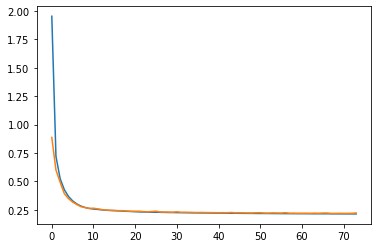

In [85]:
#Step1. Define the model10

model10 = Sequential()

model10.add(Dense(32, activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (x_train_scaled.shape[1],)))
model10.add(Dense(16, activation = 'relu', kernel_initializer = 'he_uniform', kernel_regularizer = 'l1'))
model10.add(Dense(8, activation = 'relu', kernel_initializer = 'he_uniform', kernel_regularizer = 'l1'))
model10.add(Dense(8, activation = 'relu', kernel_initializer = 'he_uniform', kernel_regularizer = 'l1'))
model10.add(Dense(1))


#Step2. Compile the model10
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model10.compile(optimizer = 'adam', loss = 'mse', metrics = 'mae')

#Step3. Fit the model10
es = EarlyStopping(monitor = 'val_loss', patience = 5)
history = model10.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=200, 
                    batch_size=64, verbose=0, callbacks = [es])

#Step4. Evaluate the model10

loss, mae = model10.evaluate(x_test_scaled, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()


In [ ]:
#4.7.3 Relu + Random Normal

685/685 [==============================] - 1s 1ms/step - loss: 0.2465 - mae: 0.3532


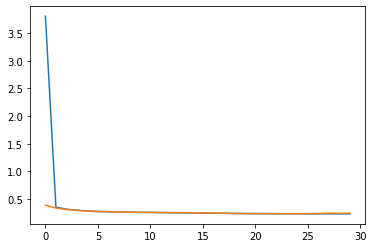

In [86]:
#Step1. Define the model11

model11 = Sequential()

model11.add(Dense(32, activation = 'relu', kernel_initializer = 'random_normal', input_shape = (x_train_scaled.shape[1],)))
model11.add(Dense(16, activation = 'relu', kernel_initializer = 'random_normal', kernel_regularizer = 'l1'))
model11.add(Dense(8, activation = 'relu', kernel_initializer = 'random_normal', kernel_regularizer = 'l1'))
model11.add(Dense(8, activation = 'relu', kernel_initializer = 'random_normal', kernel_regularizer = 'l1'))
model11.add(Dense(1))


#Step2. Compile the model11
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model11.compile(optimizer = 'adam', loss = 'mse', metrics = 'mae')

#Step3. Fit the model11
es = EarlyStopping(monitor = 'val_loss', patience = 5)
history = model11.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=200, 
                    batch_size=64, verbose=0, callbacks = [es])

#Step4. Evaluate the model11

loss, mae = model11.evaluate(x_test_scaled, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()


In [ ]:
#4.8 Neural Network with smaller batch size

685/685 [==============================] - 1s 1ms/step - loss: 0.2158 - mae: 0.3350


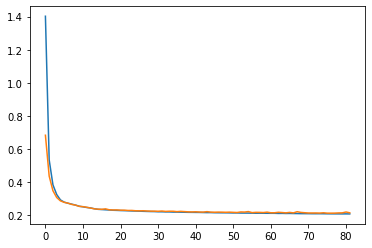

In [87]:
#Step1. Define the model12

model12 = Sequential()

model12.add(Dense(32, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (x_train_scaled.shape[1],)))
model12.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = 'l1'))
model12.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = 'l1'))
model12.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = 'l1'))
model12.add(Dense(1))


#Step2. Compile the model12
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model12.compile(optimizer = 'adam', loss = 'mse', metrics = 'mae')

#Step3. Fit the model12
es = EarlyStopping(monitor = 'val_loss', patience = 5)
history = model12.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=200, 
                    batch_size=32, verbose=0, callbacks = [es])

#Step4. Evaluate the model12

loss, mae = model12.evaluate(x_test_scaled, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()
